In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from MiscScripts.DataCleaning import *

In [13]:
df = pd.read_csv("../Data/Combined/0.5.0-Master+RDKit.csv")

def logH(x):
    new_x = []
    for i in x:
        try:
            new_x.append(np.log(i))
        except:
            new_x.append(np.nan)

    return new_x

df.dropna(subset=['HenryConstant'], inplace=True)
HenryConstant = df['HenryConstant'].values.astype(float)
logHL = np.log(HenryConstant)

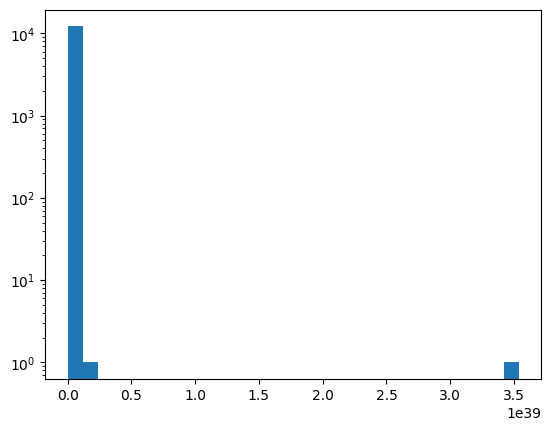

In [14]:
fig, ax = plt.subplots()
ax.hist(HenryConstant, bins=30)
ax.set_yscale('log')

Removed 98 values. 12069 values remaining.


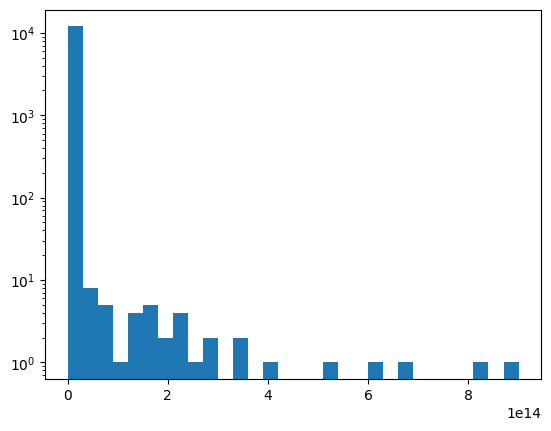

In [23]:
total = len(HenryConstant)
HenryConstantFiltered = HenryConstant[HenryConstant < 1e15]
print(f"Removed {total - len(HenryConstantFiltered)} values. {len(HenryConstantFiltered)} values remaining.")
fig, ax = plt.subplots()
ax.hist(HenryConstantFiltered, bins=30)
ax.set_yscale('log')
plt.show()

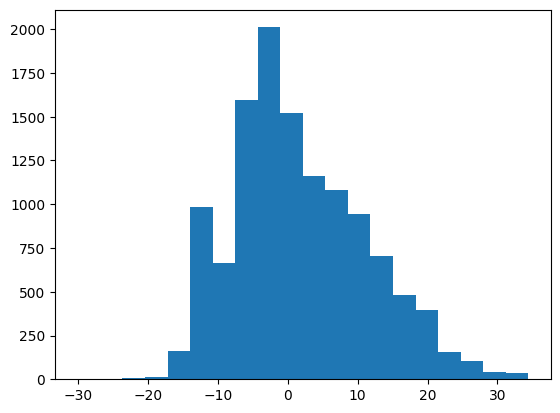

In [24]:
logFilteredH = logH(HenryConstantFiltered)
plt.hist(logFilteredH, bins=20)
plt.show()

In [4]:
def removeSingleValCols(data, cols):
    """ 
    Function that iterates through columns and deletes columns with only one unique value.
    
    Parameters:
    data: pandas DataFrame
    cols: list of strings
    
    Returns:
    data: pandas DataFrame
    """
    for col in cols:
        values = data[col].values.astype(float).tolist()
        if len(set(values)) == 1:
            data.drop(col, axis=1, inplace=True)
    return data

def cleanData(df, idx, tolPercent):
    print("\n\n", df.columns[0])

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df[pd.to_numeric(df[df.columns[0]], errors='coerce').notnull()]

    tolVal = len(df) * tolPercent
    data = df.iloc[:, idx:]
    print("Initial data shape:", data.shape)
    data, dropped = dropNaN_cols(data, data.columns, tolVal)

    data = pd.DataFrame(data)
    data.dropna(inplace=True)
    print("Shape after removing NaN columns:", data.shape)

    data = removeSingleValCols(data, data.columns)
    df = pd.concat([df.iloc[:, :idx], data], axis=1)
    print("Shape after removing single value columns:", data.shape)
    print("Final dataset shape:", df.shape)
    return df
    

In [8]:
df = pd.read_csv("../Data/Datasets/0.7.1-hasLogS.csv")
df.iloc[:, 7:]

df = cleanData(df, 7, 0.01)



 logS
Initial data shape: (11703, 212)
Shape after removing NaN columns: (11703, 199)
Shape after removing single value columns: (11703, 158)
Final dataset shape: (11703, 165)


In [9]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
X = df.iloc[:, 7:]
selector = VarianceThreshold(threshold=1)
X = selector.fit_transform(X)
print(X.shape)

(11703, 88)
